In [1]:
#必要なライブラリのインポート
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit #ShuffleSplitクラスの呼び出し
from sklearn import svm, metrics #svmとmetricsを呼び出す
from sklearn.metrics import plot_confusion_matrix #混同行列の呼び出し
from sklearn.model_selection import train_test_split # train_test_splitの読み込み
from sklearn.ensemble import RandomForestClassifier #ランダムフォレストを使うためのライブラリ
from sklearn.model_selection import LeaveOneOut #交差検証(LeaveOneOut)を使うためのライブラリ
from sklearn.model_selection import cross_val_score #交差検証に必要なライブラリ
from sklearn.model_selection import learning_curve, GridSearchCV

In [2]:
#emotion_labelデータの読みこみ

data1_a_label_50 = pd.read_csv('emotion_label/session1/A/emotion_A_20201111_1_50.csv')
data1_a_label_60 = pd.read_csv('emotion_label/session1/A/emotion_A_20201111_1_60.csv')
data1_a_label_70 = pd.read_csv('emotion_label/session1/A/emotion_A_20201111_1_70.csv')
data1_a_label_80 = pd.read_csv('emotion_label/session1/A/emotion_A_20201111_1_80.csv')

# data2_a_label_50 = pd.read_csv('emotion_label/session1/A/emotion_A_20201111_2_50.csv')
# data2_a_label_60 = pd.read_csv('emotion_label/session1/A/emotion_A_20201111_2_60.csv')
# data2_a_label_70 = pd.read_csv('emotion_label/session1/A/emotion_A_20201111_2_70.csv')
# data2_a_label_80 = pd.read_csv('emotion_label/session1/A/emotion_A_20201111_2_80.csv')

#feature_data(特徴量データーセット)の読みこみ
data1_a_record_all_feature_50 = pd.read_csv('feature/A/data1_a_50_record_all_feature.csv')
data1_a_record_all_feature_60 = pd.read_csv('feature/A/data1_a_60_record_all_feature.csv')
data1_a_record_all_feature_70 = pd.read_csv('feature/A/data1_a_70_record_all_feature.csv')
data1_a_record_all_feature_80 = pd.read_csv('feature/A/data1_a_80_record_all_feature.csv')

# data2_a_record_all_feature_50 = pd.read_csv('feature/session1/A/data2_a_50_record_all_feature.csv')
# data2_a_record_all_feature_60 = pd.read_csv('feature/session1/A/data2_a_60_record_all_feature.csv')
# data2_a_record_all_feature_70 = pd.read_csv('feature/session1/A/data2_a_70_record_all_feature.csv')
# data2_a_record_all_feature_80 = pd.read_csv('feature/session1/A/data2_a_80_record_all_feature.csv')

# feature_emg = pd.read_csv("feature_emg.csv")

#確認
display(data1_a_record_all_feature_50)
display(data1_a_label_50)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accx_min,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak
0,2020-11-11 12:40:18,2020-11-11 12:40:22,9989.120,419.244,-2052.121,22.665,5.644,5.692,46958.269600,2.519337e+04,...,9205,-20,-3095,-1501,-2919,-562,6.653620,90.358921,2.739726,327.603159
1,2020-11-11 12:40:19,2020-11-11 12:40:23,9988.680,374.708,-2093.075,10.716,40.419,-23.403,46205.525600,2.660551e+04,...,9205,-437,-3095,-1501,-2919,-714,5.870841,81.049321,1.174168,324.534956
2,2020-11-11 12:40:20,2020-11-11 12:40:24,10000.110,225.928,-2044.056,210.418,210.142,167.292,55977.995900,1.996043e+05,...,9012,-1797,-3188,-1501,-2468,-714,5.479452,169.189386,0.391389,421.393224
3,2020-11-11 12:40:21,2020-11-11 12:40:25,10008.944,-301.132,-1579.636,259.055,385.835,304.251,51479.100864,1.098852e+06,...,9012,-2847,-3188,-1501,-2468,-714,5.479452,141.644558,0.391389,562.283975
4,2020-11-11 12:40:22,2020-11-11 12:40:26,9981.447,-926.682,-977.567,231.636,435.985,297.311,56865.437191,1.851899e+06,...,9012,-3279,-3188,-2049,-2212,-1074,5.479452,124.008126,0.391389,629.463949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,2020-11-11 12:54:49,2020-11-11 12:54:53,9832.002,376.364,-2677.213,111.254,73.332,-87.704,30536.553996,3.426154e+04,...,9200,-47,-3789,-933,-2060,-812,8.610568,72.262946,0.782779,378.511950
683,2020-11-11 12:54:50,2020-11-11 12:54:54,9844.242,441.944,-2593.380,37.436,108.618,15.572,61678.375436,6.564020e+04,...,8739,-1098,-3789,-4580,-2108,-812,5.870841,52.258742,0.782779,392.086007
684,2020-11-11 12:54:51,2020-11-11 12:54:55,9820.866,323.123,-2669.401,-241.840,-48.918,71.333,78599.508044,1.586836e+05,...,8739,-1098,-4599,-4580,-2657,-1037,9.393346,46.718720,0.391389,366.460464
685,2020-11-11 12:54:52,2020-11-11 12:54:56,9706.397,324.454,-2956.586,-242.307,-201.340,50.513,146288.667391,1.591388e+05,...,8739,-1098,-4812,-4580,-2657,-1037,15.655577,36.202566,0.391389,155.225788


,start_time,finish_time,emotion_level
0,5:48,5:52,1
1,5:49,5:53,1
2,5:50,5:54,1
3,5:51,5:55,1
4,5:52,5:56,1
...,...,...,...
682,20:19,20:23,2
683,20:20,20:24,2
684,20:21,20:25,2
685,20:22,20:26,2


In [3]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=1)
    return a

data1_a_label_50 = dropna(data1_a_label_50)
data1_a_label_60 = dropna(data1_a_label_60)
data1_a_label_70 = dropna(data1_a_label_70)
data1_a_label_80 = dropna(data1_a_label_80)

# data2_a_label_50 = dropna(data2_a_label_50)
# data2_a_label_60 = dropna(data2_a_label_60)
# data2_a_label_70 = dropna(data2_c_label_70)
# data2_a_label_80 = dropna(data2_d_label_80)

In [4]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=0)
    return a

data1_a_label_50 = dropna(data1_a_label_50)
data1_a_label_60 = dropna(data1_a_label_60)
data1_a_label_70 = dropna(data1_a_label_70)
data1_a_label_80 = dropna(data1_a_label_80)

# data2_a_label_50 = dropna(data2_a_label_50)
# data2_a_label_60 = dropna(data2_a_label_60)
# data2_a_label_70 = dropna(data2_c_label_70)
# data2_a_label_80 = dropna(data2_d_label_80)

In [5]:
#emotion_labelデータからtimeHMSとsubject列を消去

data1_a_label_50 = data1_a_label_50.drop(["start_time", "finish_time"], axis=1)
data1_a_label_60 = data1_a_label_60.drop(["start_time", "finish_time"], axis=1)
data1_a_label_70 = data1_a_label_70.drop(["start_time", "finish_time"], axis=1)
data1_a_label_80 = data1_a_label_80.drop(["start_time", "finish_time"], axis=1)

# data2_a_label_50 = data2_a_label_50.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_60 = data2_a_label_60.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_70 = data2_a_label_70.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_80 = data2_a_label_80.drop(["start_time", "finish_time"], axis=1)

#確認
data1_a_label_50

,emotion_level
0,1
1,1
2,1
3,1
4,1
...,...
682,2
683,2
684,2
685,2


In [6]:
#feature_dataとemotion_labelデータを連結
data1_a_record_all_feature_50 = pd.concat([data1_a_record_all_feature_50, data1_a_label_50], axis=1, ignore_index=False)
data1_a_record_all_feature_60 = pd.concat([data1_a_record_all_feature_60, data1_a_label_60], axis=1, ignore_index=False)
data1_a_record_all_feature_70 = pd.concat([data1_a_record_all_feature_70, data1_a_label_70], axis=1, ignore_index=False)
data1_a_record_all_feature_80 = pd.concat([data1_a_record_all_feature_80, data1_a_label_80], axis=1, ignore_index=False)

# data2_a_record_all_feature_50 = pd.concat([data2_a_record_all_feature_50, data2_a_label_50], axis=1, ignore_index=False)
# data2_a_record_all_feature_60 = pd.concat([data2_a_record_all_feature_60, data2_a_label_60], axis=1, ignore_index=False)
# data2_a_record_all_feature_70 = pd.concat([data2_a_record_all_feature_70, data2_a_label_70], axis=1, ignore_index=False)
# data2_a_record_all_feature_80 = pd.concat([data2_a_record_all_feature_80, data2_a_label_80], axis=1, ignore_index=False)

#データの確認(確認のためセッション1のAさんのデータを表示している)
display(data1_a_record_all_feature_50)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 12:40:18,2020-11-11 12:40:22,9989.120,419.244,-2052.121,22.665,5.644,5.692,46958.269600,2.519337e+04,...,-20,-3095,-1501,-2919,-562,6.653620,90.358921,2.739726,327.603159,1
1,2020-11-11 12:40:19,2020-11-11 12:40:23,9988.680,374.708,-2093.075,10.716,40.419,-23.403,46205.525600,2.660551e+04,...,-437,-3095,-1501,-2919,-714,5.870841,81.049321,1.174168,324.534956,1
2,2020-11-11 12:40:20,2020-11-11 12:40:24,10000.110,225.928,-2044.056,210.418,210.142,167.292,55977.995900,1.996043e+05,...,-1797,-3188,-1501,-2468,-714,5.479452,169.189386,0.391389,421.393224,1
3,2020-11-11 12:40:21,2020-11-11 12:40:25,10008.944,-301.132,-1579.636,259.055,385.835,304.251,51479.100864,1.098852e+06,...,-2847,-3188,-1501,-2468,-714,5.479452,141.644558,0.391389,562.283975,1
4,2020-11-11 12:40:22,2020-11-11 12:40:26,9981.447,-926.682,-977.567,231.636,435.985,297.311,56865.437191,1.851899e+06,...,-3279,-3188,-2049,-2212,-1074,5.479452,124.008126,0.391389,629.463949,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,2020-11-11 12:54:49,2020-11-11 12:54:53,9832.002,376.364,-2677.213,111.254,73.332,-87.704,30536.553996,3.426154e+04,...,-47,-3789,-933,-2060,-812,8.610568,72.262946,0.782779,378.511950,2
683,2020-11-11 12:54:50,2020-11-11 12:54:54,9844.242,441.944,-2593.380,37.436,108.618,15.572,61678.375436,6.564020e+04,...,-1098,-3789,-4580,-2108,-812,5.870841,52.258742,0.782779,392.086007,2
684,2020-11-11 12:54:51,2020-11-11 12:54:55,9820.866,323.123,-2669.401,-241.840,-48.918,71.333,78599.508044,1.586836e+05,...,-1098,-4599,-4580,-2657,-1037,9.393346,46.718720,0.391389,366.460464,2
685,2020-11-11 12:54:52,2020-11-11 12:54:56,9706.397,324.454,-2956.586,-242.307,-201.340,50.513,146288.667391,1.591388e+05,...,-1098,-4812,-4580,-2657,-1037,15.655577,36.202566,0.391389,155.225788,2


In [7]:
data1_a_record_all_feature_60

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 12:40:18,2020-11-11 12:40:22,9989.120,419.244,-2052.121,22.665,5.644,5.692,46958.269600,2.519337e+04,...,-20,-3095,-1501,-2919,-562,6.653620,90.358921,2.739726,327.603159,1
1,2020-11-11 12:40:19,2020-11-11 12:40:23,9988.680,374.708,-2093.075,10.716,40.419,-23.403,46205.525600,2.660551e+04,...,-437,-3095,-1501,-2919,-714,5.870841,81.049321,1.174168,324.534956,1
2,2020-11-11 12:40:20,2020-11-11 12:40:24,10000.110,225.928,-2044.056,210.418,210.142,167.292,55977.995900,1.996043e+05,...,-1797,-3188,-1501,-2468,-714,5.479452,169.189386,0.391389,421.393224,1
3,2020-11-11 12:40:21,2020-11-11 12:40:25,10008.944,-301.132,-1579.636,259.055,385.835,304.251,51479.100864,1.098852e+06,...,-2847,-3188,-1501,-2468,-714,5.479452,141.644558,0.391389,562.283975,1
4,2020-11-11 12:40:22,2020-11-11 12:40:26,9981.447,-926.682,-977.567,231.636,435.985,297.311,56865.437191,1.851899e+06,...,-3279,-3188,-2049,-2212,-1074,5.479452,124.008126,0.391389,629.463949,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,2020-11-11 12:54:49,2020-11-11 12:54:53,9832.002,376.364,-2677.213,111.254,73.332,-87.704,30536.553996,3.426154e+04,...,-47,-3789,-933,-2060,-812,8.610568,72.262946,0.782779,378.511950,2
682,2020-11-11 12:54:50,2020-11-11 12:54:54,9844.242,441.944,-2593.380,37.436,108.618,15.572,61678.375436,6.564020e+04,...,-1098,-3789,-4580,-2108,-812,5.870841,52.258742,0.782779,392.086007,2
683,2020-11-11 12:54:51,2020-11-11 12:54:55,9820.866,323.123,-2669.401,-241.840,-48.918,71.333,78599.508044,1.586836e+05,...,-1098,-4599,-4580,-2657,-1037,9.393346,46.718720,0.391389,366.460464,2
684,2020-11-11 12:54:52,2020-11-11 12:54:56,9706.397,324.454,-2956.586,-242.307,-201.340,50.513,146288.667391,1.591388e+05,...,-1098,-4812,-4580,-2657,-1037,15.655577,36.202566,0.391389,155.225788,2


In [8]:
print(len(data1_a_record_all_feature_50))
print(len(data1_a_record_all_feature_60))
print(len(data1_a_record_all_feature_70))
print(len(data1_a_record_all_feature_80))

687
686
654
637


In [9]:
#時間でデータを切り出している
#38→上から37行目までを抜き出している
data1_a_50_record_all_feature_1 = data1_a_record_all_feature_50.iloc[0:38]
data1_a_50_record_all_feature_2 = data1_a_record_all_feature_50.iloc[38:471]
data1_a_50_record_all_feature_3 = data1_a_record_all_feature_50.iloc[471:687]

data1_a_60_record_all_feature_1 = data1_a_record_all_feature_60.iloc[0:38]
data1_a_60_record_all_feature_2 = data1_a_record_all_feature_60.iloc[38:471]
data1_a_60_record_all_feature_3 = data1_a_record_all_feature_60.iloc[471:686]

data1_a_70_record_all_feature_1 = data1_a_record_all_feature_70.iloc[0:38]
data1_a_70_record_all_feature_2 = data1_a_record_all_feature_70.iloc[38:471]
data1_a_70_record_all_feature_3 = data1_a_record_all_feature_70.iloc[471:654]

data1_a_80_record_all_feature_1 = data1_a_record_all_feature_80.iloc[0:38]
data1_a_80_record_all_feature_2 = data1_a_record_all_feature_80.iloc[38:471]
data1_a_80_record_all_feature_3 = data1_a_record_all_feature_80.iloc[471:637]


# data1_a_50_record_all_feature_1 = data1_a_record_all_feature_50.iloc[0:150]
# data1_a_50_record_all_feature_2 = data1_a_record_all_feature_50.iloc[150:300]
# data1_a_50_record_all_feature_3 = data1_a_record_all_feature_50.iloc[300:470]

# data1_a_60_record_all_feature_1 = data1_a_record_all_feature_60.iloc[0:150]
# data1_a_60_record_all_feature_2 = data1_a_record_all_feature_60.iloc[150:300]
# data1_a_60_record_all_feature_3 = data1_a_record_all_feature_60.iloc[300:470]

# data1_a_70_record_all_feature_1 = data1_a_record_all_feature_70.iloc[0:150]
# data1_a_70_record_all_feature_2 = data1_a_record_all_feature_70.iloc[150:300]
# data1_a_70_record_all_feature_3 = data1_a_record_all_feature_70.iloc[300:470]

# data1_a_80_record_all_feature_1 = data1_a_record_all_feature_80.iloc[0:150]
# data1_a_80_record_all_feature_2 = data1_a_record_all_feature_80.iloc[150:300]
# data1_a_80_record_all_feature_3 = data1_a_record_all_feature_80.iloc[300:470]

In [10]:
# data2_a_50_record_all_feature_1 = data2_a_record_all_feature_50.iloc[0:38]
# data2_a_50_record_all_feature_2 = data2_a_record_all_feature_50.iloc[38:687]
# data2_a_50_record_all_feature_3 = data2_a_record_all_feature_50.iloc[471:687]

# data2_a_60_record_all_feature_1 = data2_a_record_all_feature_60.iloc[0:38]
# data2_a_60_record_all_feature_2 = data2_a_record_all_feature_60.iloc[38:687]
# data2_a_60_record_all_feature_3 = data2_a_record_all_feature_60.iloc[471:687]

# data2_a_70_record_all_feature_1 = data2_a_record_all_feature_70.iloc[0:38]
# data2_a_70_record_all_feature_2 = data2_a_record_all_feature_70.iloc[38:687]
# data2_a_70_record_all_feature_3 = data2_a_record_all_feature_70.iloc[471:687]

# data2_a_80_record_all_feature_1 = data2_a_record_all_feature_80.iloc[0:38]
# data2_a_80_record_all_feature_2 = data2_a_record_all_feature_80.iloc[38:687]
# data2_a_80_record_all_feature_3 = data2_a_record_all_feature_80.iloc[471:687]

In [11]:
# emotion_levelの列の数値によってlabelを振り分けている
# emotion_levelの列の数値が2より大きいときはpositive
# emotion_levelの列の数値が3より小さいときはother

def emotion_level_define(data_record_all_feature):
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] > 2, "label"] = "positive"
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] <3, "label"] = "other"
    return data_record_all_feature

data1_a_50_record_all_feature_1 = emotion_level_define(data1_a_50_record_all_feature_1)
data1_a_50_record_all_feature_2 = emotion_level_define(data1_a_50_record_all_feature_2)
data1_a_50_record_all_feature_3 = emotion_level_define(data1_a_50_record_all_feature_3)

data1_a_60_record_all_feature_1 = emotion_level_define(data1_a_60_record_all_feature_1)
data1_a_60_record_all_feature_2 = emotion_level_define(data1_a_60_record_all_feature_2)
data1_a_60_record_all_feature_3 = emotion_level_define(data1_a_60_record_all_feature_3)

data1_a_70_record_all_feature_1 = emotion_level_define(data1_a_70_record_all_feature_1)
data1_a_70_record_all_feature_2 = emotion_level_define(data1_a_70_record_all_feature_2)
data1_a_70_record_all_feature_3 = emotion_level_define(data1_a_70_record_all_feature_3)

data1_a_80_record_all_feature_1 = emotion_level_define(data1_a_80_record_all_feature_1)
data1_a_80_record_all_feature_2 = emotion_level_define(data1_a_80_record_all_feature_2)
data1_a_80_record_all_feature_3 = emotion_level_define(data1_a_80_record_all_feature_3)

# data2_a_50_record_all_feature_1 = emotion_level_define(data2_a_50_record_all_feature_1)
# data2_a_50_record_all_feature_2 = emotion_level_define(data2_a_50_record_all_feature_2)
# data2_a_50_record_all_feature_3 = emotion_level_define(data2_a_50_record_all_feature_3)

# data2_a_60_record_all_feature_1 = emotion_level_define(data2_a_60_record_all_feature_1)
# data2_a_60_record_all_feature_2 = emotion_level_define(data2_a_60_record_all_feature_2)
# data2_a_60_record_all_feature_3 = emotion_level_define(data2_a_60_record_all_feature_3)

# data2_a_70_record_all_feature_1 = emotion_level_define(data2_a_70_record_all_feature_1)
# data2_a_70_record_all_feature_2 = emotion_level_define(data2_a_70_record_all_feature_2)
# data2_a_70_record_all_feature_3 = emotion_level_define(data2_a_70_record_all_feature_3)

# data2_a_80_record_all_feature_1 = emotion_level_define(data2_a_80_record_all_feature_1)
# data2_a_80_record_all_feature_2 = emotion_level_define(data2_a_80_record_all_feature_2)
# data2_a_80_record_all_feature_3 = emotion_level_define(data2_a_80_record_all_feature_3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
#特徴量データからemotion_level列を消去
def emotion_level_drop(data_record_all_feature):
    data_record_all_feature.drop(["emotion_level"], axis=1, inplace=True)
    return data_record_all_feature


data1_a_50_record_all_feature_1 = emotion_level_drop(data1_a_50_record_all_feature_1)
data1_a_50_record_all_feature_2 = emotion_level_drop(data1_a_50_record_all_feature_2)
data1_a_50_record_all_feature_3 = emotion_level_drop(data1_a_50_record_all_feature_3)

data1_a_60_record_all_feature_1 = emotion_level_drop(data1_a_60_record_all_feature_1)
data1_a_60_record_all_feature_2 = emotion_level_drop(data1_a_60_record_all_feature_2)
data1_a_60_record_all_feature_3 = emotion_level_drop(data1_a_60_record_all_feature_3)

data1_a_70_record_all_feature_1 = emotion_level_drop(data1_a_70_record_all_feature_1)
data1_a_70_record_all_feature_2 = emotion_level_drop(data1_a_70_record_all_feature_2)
data1_a_70_record_all_feature_3 = emotion_level_drop(data1_a_70_record_all_feature_3)

data1_a_80_record_all_feature_1 = emotion_level_drop(data1_a_80_record_all_feature_1)
data1_a_80_record_all_feature_2 = emotion_level_drop(data1_a_80_record_all_feature_2)
data1_a_80_record_all_feature_3 = emotion_level_drop(data1_a_80_record_all_feature_3)

# data2_a_50_record_all_feature_1 = emotion_level_drop(data2_a_50_record_all_feature_1)
# data2_a_50_record_all_feature_2 = emotion_level_drop(data2_a_50_record_all_feature_2)
# data2_a_50_record_all_feature_3 = emotion_level_drop(data2_a_50_record_all_feature_3)

# data2_a_60_record_all_feature_1 = emotion_level_drop(data2_a_60_record_all_feature_1)
# data2_a_60_record_all_feature_2 = emotion_level_drop(data2_a_60_record_all_feature_2)
# data2_a_60_record_all_feature_3 = emotion_level_drop(data2_a_60_record_all_feature_3)

# data2_a_70_record_all_feature_1 = emotion_level_drop(data2_a_70_record_all_feature_1)
# data2_a_70_record_all_feature_2 = emotion_level_drop(data2_a_70_record_all_feature_2)
# data2_a_70_record_all_feature_3 = emotion_level_drop(data2_a_70_record_all_feature_3)

# data2_a_80_record_all_feature_1 = emotion_level_drop(data2_a_80_record_all_feature_1)
# data2_a_80_record_all_feature_2 = emotion_level_drop(data2_a_80_record_all_feature_2)
# data2_a_80_record_all_feature_3 = emotion_level_drop(data2_a_80_record_all_feature_3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
data1_a_50_record_all_feature_1

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 12:40:18,2020-11-11 12:40:22,9989.120,419.244,-2052.121,22.665,5.644,5.692,46958.269600,2.519337e+04,...,-20,-3095,-1501,-2919,-562,6.653620,90.358921,2.739726,327.603159,other
1,2020-11-11 12:40:19,2020-11-11 12:40:23,9988.680,374.708,-2093.075,10.716,40.419,-23.403,46205.525600,2.660551e+04,...,-437,-3095,-1501,-2919,-714,5.870841,81.049321,1.174168,324.534956,other
2,2020-11-11 12:40:20,2020-11-11 12:40:24,10000.110,225.928,-2044.056,210.418,210.142,167.292,55977.995900,1.996043e+05,...,-1797,-3188,-1501,-2468,-714,5.479452,169.189386,0.391389,421.393224,other
3,2020-11-11 12:40:21,2020-11-11 12:40:25,10008.944,-301.132,-1579.636,259.055,385.835,304.251,51479.100864,1.098852e+06,...,-2847,-3188,-1501,-2468,-714,5.479452,141.644558,0.391389,562.283975,other
4,2020-11-11 12:40:22,2020-11-11 12:40:26,9981.447,-926.682,-977.567,231.636,435.985,297.311,56865.437191,1.851899e+06,...,-3279,-3188,-2049,-2212,-1074,5.479452,124.008126,0.391389,629.463949,other
5,2020-11-11 12:40:23,2020-11-11 12:40:27,9965.756,-1500.773,-387.076,246.362,339.093,239.776,47215.256464,1.738890e+06,...,-3279,-3188,-2049,-2212,-1074,9.784736,80.971606,0.391389,921.107081,other
6,2020-11-11 12:40:31,2020-11-11 12:40:35,10054.822,408.990,-1676.249,-86.230,126.045,-21.072,69884.928316,2.195737e+05,...,-991,-3200,-3714,-3474,-1312,1.565558,125.284031,0.391389,629.093124,other
7,2020-11-11 12:40:32,2020-11-11 12:40:36,10046.533,538.998,-1669.254,126.856,52.298,-90.215,61776.514911,1.196996e+05,...,-801,-3200,-3092,-3474,-1312,4.305284,88.449405,0.391389,577.735704,other
8,2020-11-11 12:40:39,2020-11-11 12:40:43,10043.615,541.746,-1697.731,3.122,90.332,-17.436,125551.644775,3.837647e+04,...,-50,-3498,-1122,-4005,-616,3.522505,345.272979,0.391389,460.351788,other
9,2020-11-11 12:40:40,2020-11-11 12:40:44,10067.262,538.957,-1604.651,-7.606,119.276,-20.507,38055.363356,1.811111e+04,...,9,-3000,-1122,-1511,-403,3.913894,121.997550,0.782779,232.903585,other


In [14]:
#全データからpositiveの数を確認
data1_a_50_record_all_feature_positive_1 = data1_a_50_record_all_feature_1[data1_a_50_record_all_feature_1.label == "positive"]
data1_a_50_record_all_feature_positive_1 = data1_a_50_record_all_feature_positive_1.reset_index(drop=True)
print(len(data1_a_50_record_all_feature_positive_1))

data1_a_50_record_all_feature_positive_2 = data1_a_50_record_all_feature_2[data1_a_50_record_all_feature_2.label == "positive"]
data1_a_50_record_all_feature_positive_2 = data1_a_50_record_all_feature_positive_2.reset_index(drop=True)
print(len(data1_a_50_record_all_feature_positive_2))

data1_a_50_record_all_feature_positive_3 = data1_a_50_record_all_feature_3[data1_a_50_record_all_feature_3.label == "positive"]
data1_a_50_record_all_feature_positive_3 = data1_a_50_record_all_feature_positive_3.reset_index(drop=True)
print(len(data1_a_50_record_all_feature_positive_3))

data1_a_60_record_all_feature_positive_1 = data1_a_60_record_all_feature_1[data1_a_60_record_all_feature_1.label == "positive"]
data1_a_60_record_all_feature_positive_1 = data1_a_60_record_all_feature_positive_1.reset_index(drop=True)
print(len(data1_a_60_record_all_feature_positive_1))

data1_a_60_record_all_feature_positive_2 = data1_a_60_record_all_feature_2[data1_a_60_record_all_feature_2.label == "positive"]
data1_a_60_record_all_feature_positive_2 = data1_a_60_record_all_feature_positive_2.reset_index(drop=True)
print(len(data1_a_60_record_all_feature_positive_2))

data1_a_60_record_all_feature_positive_3 = data1_a_60_record_all_feature_3[data1_a_60_record_all_feature_3.label == "positive"]
data1_a_60_record_all_feature_positive_3 = data1_a_60_record_all_feature_positive_3.reset_index(drop=True)
print(len(data1_a_60_record_all_feature_positive_3))

data1_a_70_record_all_feature_positive_1 = data1_a_70_record_all_feature_1[data1_a_70_record_all_feature_1.label == "positive"]
data1_a_670_record_all_feature_positive_1 = data1_a_70_record_all_feature_positive_1.reset_index(drop=True)
print(len(data1_a_70_record_all_feature_positive_1))

data1_a_70_record_all_feature_positive_2 = data1_a_70_record_all_feature_2[data1_a_70_record_all_feature_2.label == "positive"]
data1_a_70_record_all_feature_positive_2 = data1_a_70_record_all_feature_positive_2.reset_index(drop=True)
print(len(data1_a_70_record_all_feature_positive_2))

data1_a_70_record_all_feature_positive_3 = data1_a_70_record_all_feature_3[data1_a_70_record_all_feature_3.label == "positive"]
data1_a_70_record_all_feature_positive_3 = data1_a_70_record_all_feature_positive_3.reset_index(drop=True)
print(len(data1_a_70_record_all_feature_positive_3))

data1_a_80_record_all_feature_positive_1 = data1_a_80_record_all_feature_1[data1_a_80_record_all_feature_1.label == "positive"]
data1_a_80_record_all_feature_positive_1 = data1_a_80_record_all_feature_positive_1.reset_index(drop=True)
print(len(data1_a_80_record_all_feature_positive_1))

data1_a_80_record_all_feature_positive_2 = data1_a_80_record_all_feature_2[data1_a_80_record_all_feature_2.label == "positive"]
data1_a_80_record_all_feature_positive_2 = data1_a_80_record_all_feature_positive_2.reset_index(drop=True)
print(len(data1_a_80_record_all_feature_positive_2))

data1_a_80_record_all_feature_positive_3 = data1_a_80_record_all_feature_3[data1_a_80_record_all_feature_3.label == "positive"]
data1_a_80_record_all_feature_positive_3 = data1_a_80_record_all_feature_positive_3.reset_index(drop=True)
print(len(data1_a_80_record_all_feature_positive_3))

16
109
18
16
109
18
19
102
14
22
98
13


In [15]:
# data2_a_50_record_all_feature_positive_1 = data2_a_50_record_all_feature_1[data2_a_50_record_all_feature_1.label == "positive"]
# data2_a_50_record_all_feature_positive_1 = data2_a_50_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_1))

# data2_a_50_record_all_feature_positive_2 = data2_a_50_record_all_feature_2[data2_a_50_record_all_feature_2.label == "positive"]
# data2_a_50_record_all_feature_positive_2 = data2_a_50_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_2))

# data2_a_50_record_all_feature_positive_3 = data2_a_50_record_all_feature_3[data2_a_50_record_all_feature_3.label == "positive"]
# data2_a_50_record_all_feature_positive_3 = data2_a_50_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_3))

# data2_a_60_record_all_feature_positive_1 = data2_a_60_record_all_feature_1[data2_a_60_record_all_feature_1.label == "positive"]
# data2_a_60_record_all_feature_positive_1 = data2_a_60_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_1))

# data2_a_60_record_all_feature_positive_2 = data2_a_60_record_all_feature_2[data2_a_60_record_all_feature_2.label == "positive"]
# data2_a_60_record_all_feature_positive_2 = data2_a_60_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_2))

# data2_a_60_record_all_feature_positive_3 = data2_a_60_record_all_feature_3[data2_a_60_record_all_feature_3.label == "positive"]
# data2_a_60_record_all_feature_positive_3 = data2_a_60_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_3))

# data2_a_70_record_all_feature_positive_1 = data2_a_70_record_all_feature_1[data2_a_70_record_all_feature_1.label == "positive"]
# data2_a_670_record_all_feature_positive_1 = data2_a_70_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_1))

# data2_a_70_record_all_feature_positive_2 = data2_a_70_record_all_feature_2[data2_a_70_record_all_feature_2.label == "positive"]
# data2_a_70_record_all_feature_positive_2 = data2_a_70_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_2))

# data2_a_70_record_all_feature_positive_3 = data2_a_70_record_all_feature_3[data2_a_70_record_all_feature_3.label == "positive"]
# data2_a_70_record_all_feature_positive_3 = data2_a_70_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_3))

# data2_a_80_record_all_feature_positive_1 = data2_a_80_record_all_feature_1[data2_a_80_record_all_feature_1.label == "positive"]
# data2_a_80_record_all_feature_positive_1 = data2_a_80_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_1))

# data2_a_80_record_all_feature_positive_2 = data2_a_80_record_all_feature_2[data2_a_80_record_all_feature_2.label == "positive"]
# data2_a_80_record_all_feature_positive_2 = data2_a_80_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_2))

# data2_a_80_record_all_feature_positive_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "positive"]
# data2_a_80_record_all_feature_positive_3 = data2_a_80_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_3))

In [16]:
# #全データからotherの数を確認
data1_a_50_record_all_feature_other_1 = data1_a_50_record_all_feature_1[data1_a_50_record_all_feature_1.label == "other"]
data1_a_50_record_all_feature_other_1 = data1_a_50_record_all_feature_other_1.reset_index(drop=True)
print(len(data1_a_50_record_all_feature_other_1))

data1_a_50_record_all_feature_other_2 = data1_a_50_record_all_feature_2[data1_a_50_record_all_feature_2.label == "other"]
data1_a_50_record_all_feature_other_2 = data1_a_50_record_all_feature_other_2.reset_index(drop=True)
print(len(data1_a_50_record_all_feature_other_2))

data1_a_50_record_all_feature_other_3 = data1_a_50_record_all_feature_3[data1_a_50_record_all_feature_3.label == "other"]
data1_a_50_record_all_feature_other_3 = data1_a_50_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_a_50_record_all_feature_other_3))

data1_a_60_record_all_feature_other_2 = data1_a_60_record_all_feature_2[data1_a_60_record_all_feature_2.label == "other"]
data1_a_60_record_all_feature_other_2 = data1_a_60_record_all_feature_other_2.reset_index(drop=True)
print(len(data1_a_60_record_all_feature_other_2))

data1_a_60_record_all_feature_other_3 = data1_a_60_record_all_feature_3[data1_a_60_record_all_feature_3.label == "other"]
data1_a_60_record_all_feature_other_3 = data1_a_60_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_a_60_record_all_feature_other_3))

data1_a_60_record_all_feature_other_1 = data1_a_60_record_all_feature_1[data1_a_60_record_all_feature_1.label == "other"]
data1_a_60_record_all_feature_other_1 = data1_a_60_record_all_feature_other_1.reset_index(drop=True)
print(len(data1_a_60_record_all_feature_other_1))

data1_a_70_record_all_feature_other_2 = data1_a_70_record_all_feature_2[data1_a_70_record_all_feature_2.label == "other"]
data1_a_70_record_all_feature_other_2 = data1_a_70_record_all_feature_other_2.reset_index(drop=True)
print(len(data1_a_70_record_all_feature_other_2))

data1_a_70_record_all_feature_other_3 = data1_a_70_record_all_feature_3[data1_a_70_record_all_feature_3.label == "other"]
data1_a_70_record_all_feature_other_3 = data1_a_70_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_a_70_record_all_feature_other_3))

data1_a_70_record_all_feature_other_1 = data1_a_70_record_all_feature_1[data1_a_70_record_all_feature_1.label == "other"]
data1_a_70_record_all_feature_other_1 = data1_a_70_record_all_feature_other_1.reset_index(drop=True)
print(len(data1_a_70_record_all_feature_other_1))

data1_a_80_record_all_feature_other_2 = data1_a_80_record_all_feature_2[data1_a_80_record_all_feature_2.label == "other"]
data1_a_80_record_all_feature_other_2 = data1_a_80_record_all_feature_other_2.reset_index(drop=True)
print(len(data1_a_80_record_all_feature_other_2))

data1_a_80_record_all_feature_other_3 = data1_a_80_record_all_feature_3[data1_a_80_record_all_feature_3.label == "other"]
data1_a_80_record_all_feature_other_3 = data1_a_80_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_a_80_record_all_feature_other_3))

data1_a_80_record_all_feature_other_3 = data1_a_80_record_all_feature_3[data1_a_80_record_all_feature_3.label == "other"]
data1_a_80_record_all_feature_other_3 = data1_a_80_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_a_80_record_all_feature_other_3))

22
324
198
324
197
22
331
169
19
335
153
153


In [17]:
# data2_a_50_record_all_feature_other_1 = data2_a_50_record_all_feature_1[data2_a_50_record_all_feature_1.label == "other"]
# data2_a_50_record_all_feature_other_1 = data2_a_50_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_1))

# data2_a_50_record_all_feature_other_2 = data2_a_50_record_all_feature_2[data2_a_50_record_all_feature_2.label == "other"]
# data2_a_50_record_all_feature_other_2 = data2_a_50_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_2))

# data2_a_50_record_all_feature_other_3 = data2_a_50_record_all_feature_3[data2_a_50_record_all_feature_3.label == "other"]
# data2_a_50_record_all_feature_other_3 = data2_a_50_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_3))

# data2_a_60_record_all_feature_other_2 = data2_a_60_record_all_feature_2[data2_a_60_record_all_feature_2.label == "other"]
# data2_a_60_record_all_feature_other_2 = data2_a_60_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_2))

# data2_a_60_record_all_feature_other_3 = data2_a_60_record_all_feature_3[data2_a_60_record_all_feature_3.label == "other"]
# data2_a_60_record_all_feature_other_3 = data2_a_60_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_3))

# data2_a_60_record_all_feature_other_1 = data2_a_60_record_all_feature_1[data2_a_60_record_all_feature_1.label == "other"]
# data2_a_60_record_all_feature_other_1 = data2_a_60_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_1))

# data2_a_70_record_all_feature_other_2 = data2_a_70_record_all_feature_2[data2_a_70_record_all_feature_2.label == "other"]
# data2_a_70_record_all_feature_other_2 = data2_a_70_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_2))

# data2_a_70_record_all_feature_other_3 = data2_a_70_record_all_feature_3[data2_a_70_record_all_feature_3.label == "other"]
# data2_a_70_record_all_feature_other_3 = data2_a_70_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_3))

# data2_a_70_record_all_feature_other_1 = data2_a_70_record_all_feature_1[data2_a_70_record_all_feature_1.label == "other"]
# data2_a_70_record_all_feature_other_1 = data2_a_70_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_1))

# data2_a_80_record_all_feature_other_2 = data2_a_80_record_all_feature_2[data2_a_80_record_all_feature_2.label == "other"]
# data2_a_80_record_all_feature_other_2 = data2_a_80_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_2))

# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "other"]
# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_3))

# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "other"]
# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_3))

In [18]:
#学習データとテストデータに分ける

train_data = pd.concat([data1_a_50_record_all_feature_1, data1_a_50_record_all_feature_2], ignore_index=True)
test_data = data1_a_50_record_all_feature_3

In [19]:
train_data

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 12:40:18,2020-11-11 12:40:22,9989.120,419.244,-2052.121,22.665,5.644,5.692,46958.269600,2.519337e+04,...,-20,-3095,-1501,-2919,-562,6.653620,90.358921,2.739726,327.603159,other
1,2020-11-11 12:40:19,2020-11-11 12:40:23,9988.680,374.708,-2093.075,10.716,40.419,-23.403,46205.525600,2.660551e+04,...,-437,-3095,-1501,-2919,-714,5.870841,81.049321,1.174168,324.534956,other
2,2020-11-11 12:40:20,2020-11-11 12:40:24,10000.110,225.928,-2044.056,210.418,210.142,167.292,55977.995900,1.996043e+05,...,-1797,-3188,-1501,-2468,-714,5.479452,169.189386,0.391389,421.393224,other
3,2020-11-11 12:40:21,2020-11-11 12:40:25,10008.944,-301.132,-1579.636,259.055,385.835,304.251,51479.100864,1.098852e+06,...,-2847,-3188,-1501,-2468,-714,5.479452,141.644558,0.391389,562.283975,other
4,2020-11-11 12:40:22,2020-11-11 12:40:26,9981.447,-926.682,-977.567,231.636,435.985,297.311,56865.437191,1.851899e+06,...,-3279,-3188,-2049,-2212,-1074,5.479452,124.008126,0.391389,629.463949,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,2020-11-11 12:50:20,2020-11-11 12:50:24,9669.719,602.524,-3169.548,15.930,-97.772,-21.968,67366.172039,8.680680e+04,...,-64,-3972,-1622,-5060,-952,3.522505,144.747424,0.782779,678.030084,positive
467,2020-11-11 12:50:21,2020-11-11 12:50:25,9628.697,622.373,-3310.312,13.130,17.657,-17.421,30293.677191,9.126086e+04,...,-64,-3972,-1622,-2279,-952,2.739726,62.340429,0.391389,269.684913,positive
468,2020-11-11 12:50:22,2020-11-11 12:50:26,9622.418,559.907,-3338.403,12.335,55.751,31.167,19766.283276,1.117114e+05,...,-359,-3972,-1622,-1456,-574,3.131115,84.778178,0.391389,273.239790,positive
469,2020-11-11 12:50:23,2020-11-11 12:50:27,9621.946,472.018,-3338.933,34.657,47.919,-17.626,59349.929084,9.012411e+04,...,-359,-4372,-1622,-3401,-629,3.131115,87.169668,0.391389,211.190333,positive


In [20]:
X_train = train_data.iloc[0:,2:30]
y_train = train_data.label

X_test = test_data.iloc[0:,2:30]
y_test = test_data.label

# X_train = train_data.iloc[0:,2:28]
# y_train = test_data.iloc[0:,2:28]

# X_test = train_data.label
# y_test = test_data.label

In [21]:
# random = RandomForestClassifier(random_state=42)
# loo=LeaveOneOut()

# score = cross_val_score(random, X, y, cv = 5)
# print(score.mean())
# print(score)

正答率0.9120370370370371
誤った個数：19
classification report
              precision    recall  f1-score   support

       other       0.93      0.98      0.95       198
    positive       0.43      0.17      0.24        18

    accuracy                           0.91       216
   macro avg       0.68      0.57      0.60       216
weighted avg       0.89      0.91      0.89       216

Confusion matrix, without normalization
[[194   4]
 [ 15   3]]


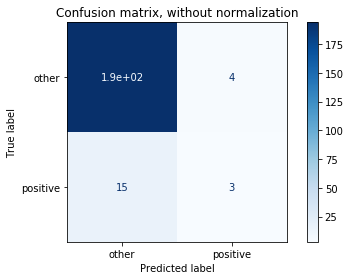

Normalized confusion matrix
[[0.97979798 0.02020202]
 [0.83333333 0.16666667]]


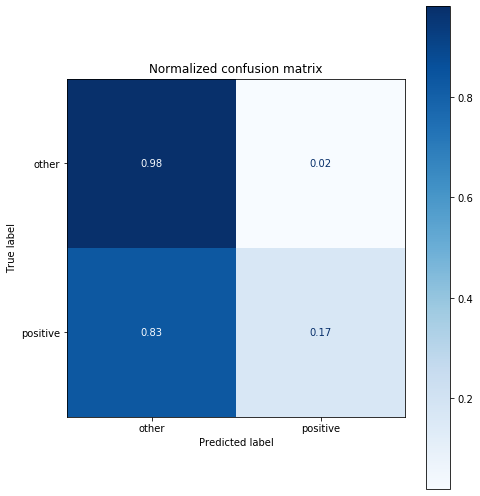

In [22]:
random = RandomForestClassifier(random_state=42)
# random = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth= 2, max_features= 10, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 300)
random.fit(X_train, y_train)

level_names = ["other", "positive"]

# モデルの学習結果を評価する
accuracy = random.score(X_test, y_test)    # テストデータで試す
print(f"正答率{accuracy}")
predicted = random.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

# 詳しいレポート
print("classification report")
print(metrics.classification_report(y_test, predicted))

#混同行列の作成
class_names = level_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(random, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.rcParams["figure.figsize"] = (7, 7)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    plt.tight_layout()
    plt.show()

# 特徴量選択

In [23]:
other = "0"
positive = "1"

X_train = pd.DataFrame(X_train)
X_train = X_train.reset_index(drop=True)
X_train_time = data1_a_record_all_feature_50.iloc[471:687]
X_train_time = X_train_time.iloc[0:,0:2]
X_train_time = X_train_time.reset_index(drop=True)
X_train_time = pd.concat([X_train_time, y_train], axis=1)
X_train_time.columns = ["start", "finish", "emotion_level"]
X_train_time.loc[X_train_time["emotion_level"] == "other", "label"] = 0
X_train_time.loc[X_train_time["emotion_level"] == "positive", "label"] = 1
X_train_time

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)
y_test_time = data1_a_record_all_feature_50.iloc[0:471]
y_test_time = y_test_time.iloc[0:,0:2]
y_test_time = y_test_time.reset_index(drop=True)
y_test_time = pd.concat([y_test_time, y_test], axis=1)
y_test_time.columns = ["start", "finish", "emotion_level"]
y_test_time.loc[y_test_time["emotion_level"] == "other", "label"] = 0
y_test_time.loc[y_test_time["emotion_level"] == "positive", "label"] = 1
y_test_time

predicted = pd.DataFrame(predicted)
predict_time = data1_a_record_all_feature_50.iloc[0:471]
predict_time = predict_time.iloc[0:,0:2]
predict_time = predict_time.reset_index(drop=True)
predict_time = pd.concat([predict_time, predicted], axis=1)
predict_time.columns = ["start", "finish", "emotion_level"]
predict_time.loc[predict_time["emotion_level"] == "other", "label"] = 0
predict_time.loc[predict_time["emotion_level"] == "positive", "label"] = 1
predict_time

,start,finish,emotion_level,label
0,2020-11-11 12:40:18,2020-11-11 12:40:22,positive,1.0
1,2020-11-11 12:40:19,2020-11-11 12:40:23,other,0.0
2,2020-11-11 12:40:20,2020-11-11 12:40:24,other,0.0
3,2020-11-11 12:40:21,2020-11-11 12:40:25,other,0.0
4,2020-11-11 12:40:22,2020-11-11 12:40:26,other,0.0
...,...,...,...,...
466,2020-11-11 12:50:20,2020-11-11 12:50:24,NaN,NaN
467,2020-11-11 12:50:21,2020-11-11 12:50:25,NaN,NaN
468,2020-11-11 12:50:22,2020-11-11 12:50:26,NaN,NaN
469,2020-11-11 12:50:23,2020-11-11 12:50:27,NaN,NaN


In [24]:
y_test_time

,start,finish,emotion_level,label
0,2020-11-11 12:40:18,2020-11-11 12:40:22,other,0.0
1,2020-11-11 12:40:19,2020-11-11 12:40:23,other,0.0
2,2020-11-11 12:40:20,2020-11-11 12:40:24,other,0.0
3,2020-11-11 12:40:21,2020-11-11 12:40:25,other,0.0
4,2020-11-11 12:40:22,2020-11-11 12:40:26,other,0.0
...,...,...,...,...
466,2020-11-11 12:50:20,2020-11-11 12:50:24,NaN,NaN
467,2020-11-11 12:50:21,2020-11-11 12:50:25,NaN,NaN
468,2020-11-11 12:50:22,2020-11-11 12:50:26,NaN,NaN
469,2020-11-11 12:50:23,2020-11-11 12:50:27,NaN,NaN


In [25]:
test = pd.concat([X_train_time, y_test_time], ignore_index=True, axis=0)
predicted = predict_time

In [26]:
test["start"] = pd.to_datetime(test['start'])
predicted["start"] = pd.to_datetime(predicted['start'])

test.set_index("start", inplace=True)
predicted.set_index("start", inplace=True)

In [27]:
test

,finish,emotion_level,label
start,,,
2020-11-11 12:50:32,2020-11-11 12:50:36,other,0.0
2020-11-11 12:50:33,2020-11-11 12:50:37,other,0.0
2020-11-11 12:50:34,2020-11-11 12:50:38,other,0.0
2020-11-11 12:50:35,2020-11-11 12:50:39,other,0.0
2020-11-11 12:50:36,2020-11-11 12:50:40,other,0.0
...,...,...,...
2020-11-11 12:50:20,2020-11-11 12:50:24,NaN,NaN
2020-11-11 12:50:21,2020-11-11 12:50:25,NaN,NaN
2020-11-11 12:50:22,2020-11-11 12:50:26,NaN,NaN


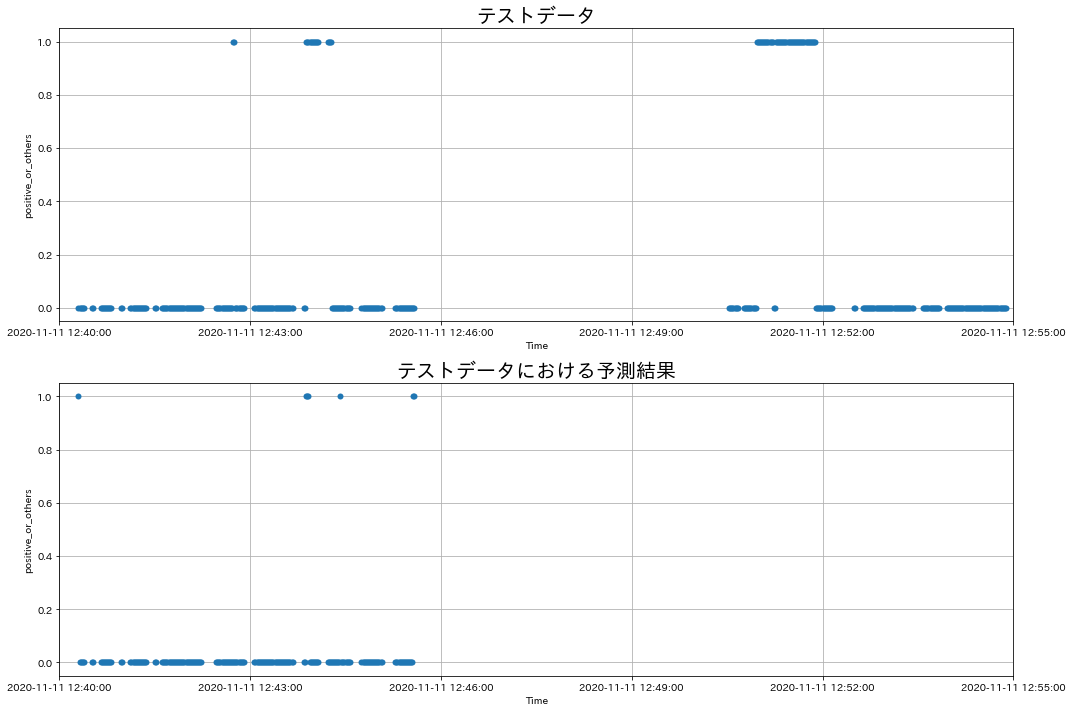

In [28]:
import datetime
import matplotlib.dates as mdates
import japanize_matplotlib

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(test.index, test["label"], marker="o", markeredgewidth=0,linewidth=0)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax1.set_xlim(datetime.datetime(2020,11,11,12,40,0), datetime.datetime(2020,11,11,12,55,0))
# ax1.set_ylim(0, 1)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(range(40, 56, 3)))
ax1.set_title("テストデータ", fontsize=20)
ax1.set_xlabel("Time")
ax1.set_ylabel("positive_or_others")
ax1.grid(True)

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(predicted.index, predicted["label"], marker="o", markeredgewidth=0,linewidth=0)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax2.set_xlim(datetime.datetime(2020,11,11,12,40,0), datetime.datetime(2020,11,11,12,55,0))
ax2.xaxis.set_major_locator(mdates.MinuteLocator(range(40, 56, 3)))
ax2.set_title("テストデータにおける予測結果", fontsize=20)
ax2.set_xlabel("Time")
ax2.set_ylabel("positive_or_others")
ax2.grid(True)

plt.tight_layout()